In [4]:
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [12]:
def mean(x): return sum(x) / len(x)

In [3]:
results_dir = Path("../out/experiments")

In [10]:
results = {}
for i in range(3):
    for rank in [None, 1, 5, 10, 25, 50]:
        try:
            if rank is None:
                filename = f"baseline_{i}"
            else:
                filename = f"postvar_{rank}rank_{i}"
            with open(results_dir / filename / "accuracy_9.txt", "r") as f:
                result = json.load(f)
        except:
            continue
        results[filename] = result

In [14]:
merged_results = {}
for rank in [None, 1, 5, 10, 25, 50]:
    merged_result = {i: [] for i in range(9)}
    for i in range(3):
        if rank is None:
            filename = f"baseline_{i}"
        else:
            filename = f"postvar_{rank}rank_{i}"
        if filename in results:
            for j in range(9):
                merged_result[j].append(results[filename][j])
    merged_results["_".join(filename.split("_")[:-1])] = [mean(merged_result[j]) for j in range(9)]

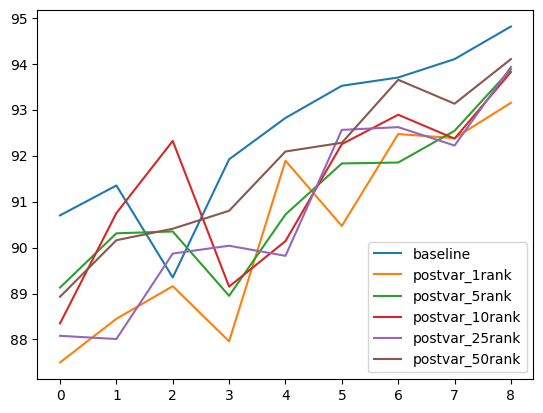

In [15]:
for name,accs in merged_results.items():
    plt.plot(accs, label=name)
plt.legend()
plt.show()

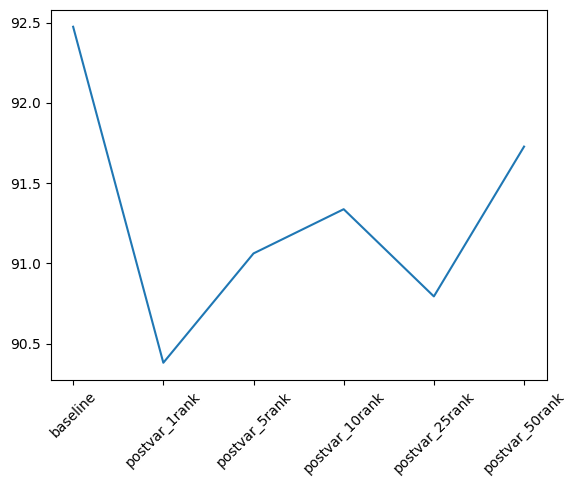

In [19]:
plt.plot([name for name in merged_results.keys()], [mean(accs) for accs in merged_results.values()])
plt.xticks(rotation=45) 
plt.show()

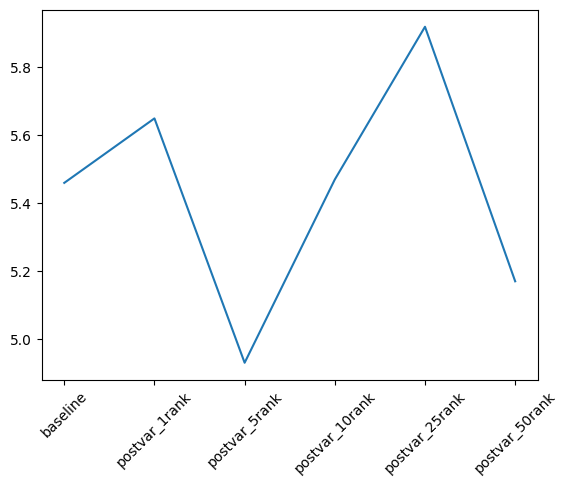

In [20]:
plt.plot([name for name in merged_results.keys()], [max(accs)-min(accs) for accs in merged_results.values()])
plt.xticks(rotation=45) 
plt.show()